# 线性回归

定义：利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。其表达形式为y = w'x+e，e为误差服从均值为0的正态分布

导入本节中实验所需的包或模块 其中 matplotlib用于作图

In [109]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

生成数据集

In [148]:
num_inputs = 2 #输入特征数 2
num_examples = 1000 #数据集样本数量 1000
true_w = torch.tensor([2,-3.4]) #线性回归真实权重 w = [2,-3.4]T
true_b = 4.2 #真实偏差 b = 4.2
features = torch.randn(num_examples,num_inputs,dtype=torch.float32) # y = wT x + b + c(c为随机噪声) 
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b # [:,0]表示取二维数组第一维的所有数及第二维的第0位
labels += torch.tensor(np.random.normal(0,0.1,size = labels.size()),dtype = torch.float32) # 随机噪声c 服从N(0,0.01)

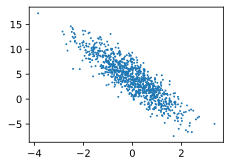

In [131]:
def use_svg_display():#用矢量图显示
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize = (3.5,2.5)):#设置图的尺寸
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1);

In [132]:
#读取数据 训练模型时 我们需要遍历数据集并不断读取小批量数据样本 此函数实现此功能
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) #样本的读取顺序是随机的 random.shuffle() -> 将列表中的元素随机排序
    for i in range(0,num_examples,batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_size,num_examples)])#最后一次可能不足一个batch
        yield features.index_select(0,j),labels.index_select(0,j)#0代表维度 j代表索引序号

In [133]:
#初始化模型参数
w = torch.tensor(np.random.normal(0,0.1,(num_inputs,1)),dtype = torch.float32)#权重w初始化为 均值为0，标准差为0.01的正态随机数
b = torch.zeros(1,dtype=torch.float32)#偏差初始化为0

In [134]:
#模型训练中 需要对这些 参数 求梯度来迭代参数的值，因此需要让他们的 requires_grad = True
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

In [135]:
#定义模型 使用mm函数座矩阵乘法 实现线性回归矢量计算
def linreg(X,w,b):
    return torch.mm(X,w) + b

In [161]:
#定义损失函数 l(w,b) = 1/2(y_hat - y)2
def squared_loss(y_hat,y):
    return (y_hat - y.view(y_hat.size()))**2/2 #返回的是向量

In [162]:
#定义优化算法 小批量随机梯度下降法
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad / batch_size #学习率：lr 即学习步长  批量大小：batch_size 认为设定 两个超参数 
        #.data 可以保证参数优化 不被附加

In [163]:
#train
lr = 0.03#学习率
num_epochs = 3 #迭代周期个数
net = linreg #模型
loss = squared_loss #损失函数

for epoch in range(num_epochs): 
#训练模型一共需要num_epochs个迭代周期
#在每一个迭代周期中，会使用训练数据集中所有样本一次。
#X和y分别是小批量样本的特征和标签
    for X,y in data_iter(batch_size , features , labels):
        l = loss(net(X,w,b),y).sum() #sum()将l求和 成为一个标量
        l.backward()# 小批量的损失对模型参数求梯度
        sgd([w,b],lr,batch_size)# 优化算法
        #梯度清零 pytorch会默认对梯度进行累加 梯度清零不会影响后续的batch
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features,w,b),labels)
    
    print('epoch %d , loss %f' % (epoch + 1,train_l.mean().item()))

epoch 1 , loss 0.005122
epoch 2 , loss 0.005112
epoch 3 , loss 0.005112


In [143]:
print(true_w , '\n' , w)
print(true_b , '\n' , b)

tensor([ 2.0000, -3.4000]) 
 tensor([[ 2.0021],
        [-3.3982]], requires_grad=True)
4.2 
 tensor([4.2078], requires_grad=True)
